<a href="https://colab.research.google.com/github/vishnuv0007/ICT_Assignments/blob/main/Vishnu_V_Assignment8_UnsupervisedLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [303]:
#importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [304]:
#reading wine cluster dataset to python envt
data=pd.read_csv('/content/Wine_clust  (1).csv')
data

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [305]:
#checking whether null values are present
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


No null values found

In [306]:
data.columns

Index(['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline'],
      dtype='object')

Checking for outliers

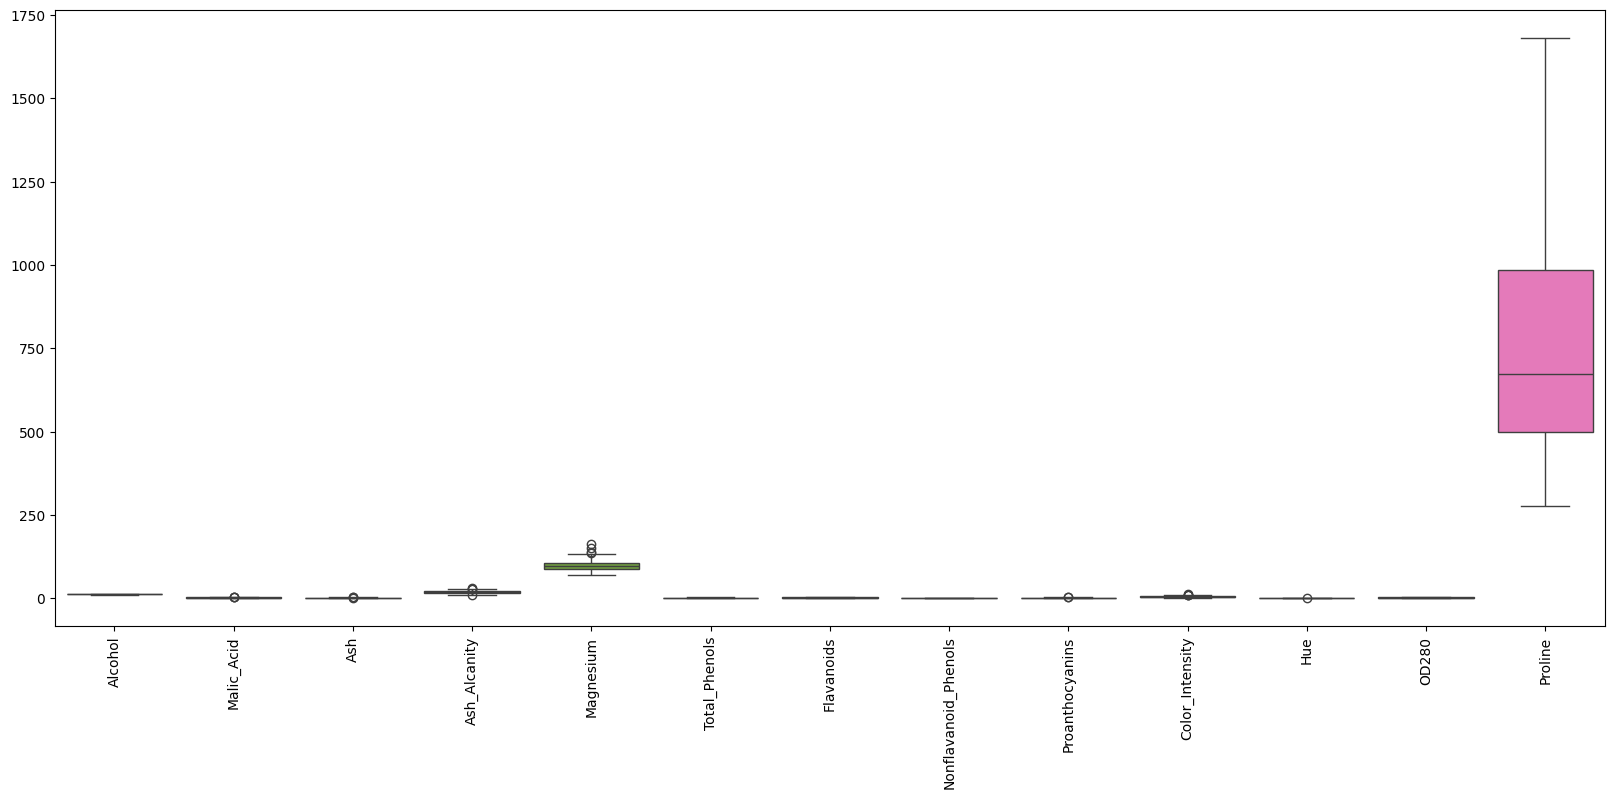

In [267]:
plt.figure(figsize=(20,8))
sns.boxplot(data)
plt.xticks(rotation=90)
plt.show()

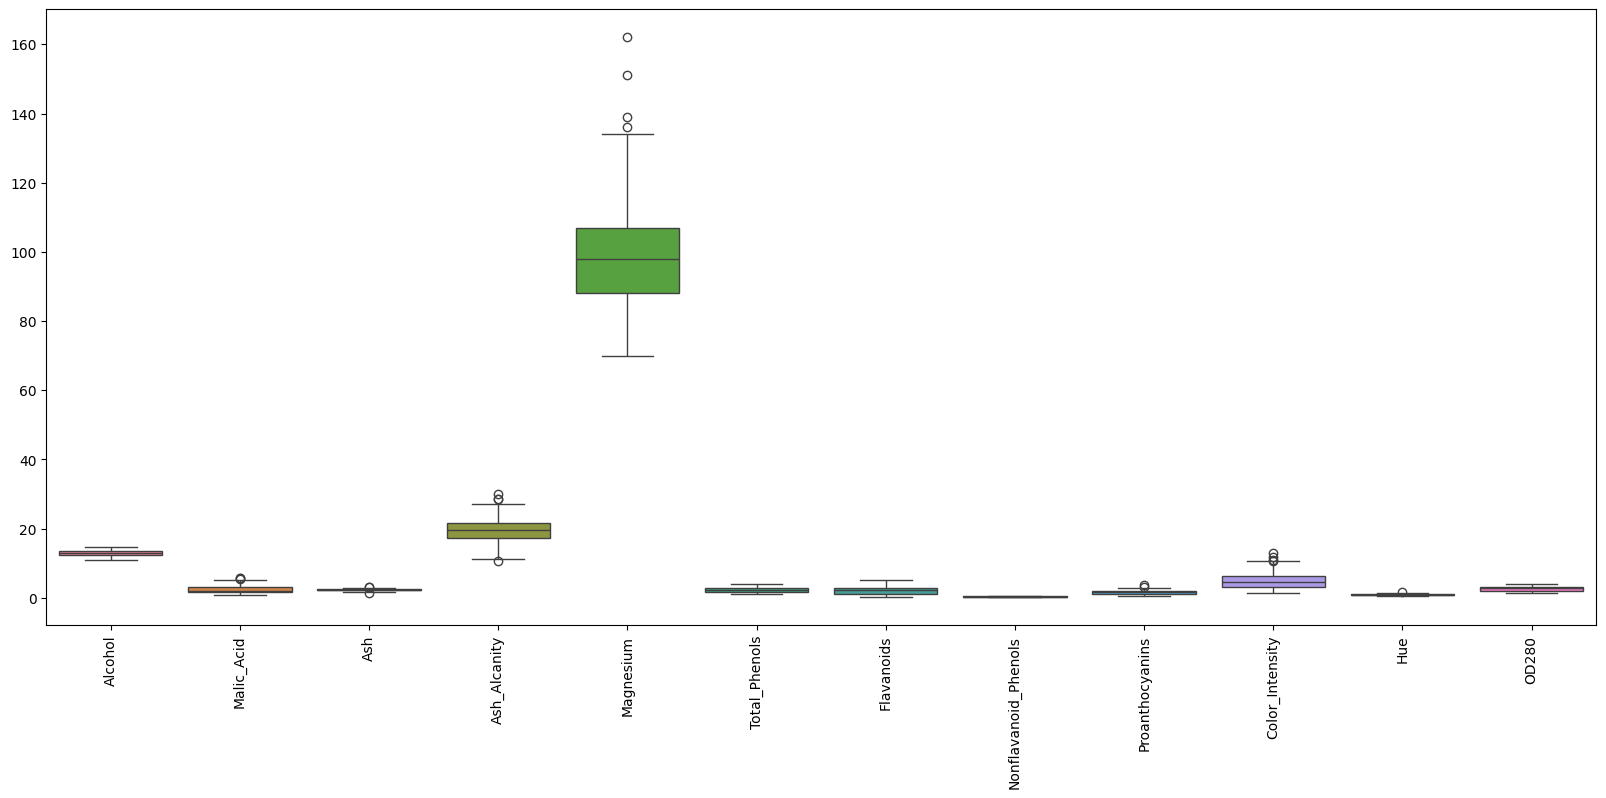

In [268]:
plt.figure(figsize=(20,8))
boxplot_col=['Alcohol','Malic_Acid','Ash','Ash_Alcanity','Magnesium',
       'Total_Phenols','Flavanoids','Nonflavanoid_Phenols',
       'Proanthocyanins','Color_Intensity','Hue','OD280',]
plt.xticks(rotation=90)
sns.boxplot(data[boxplot_col])
plt.show()

Very large outliers are not found, so outliers are kept as such

In [278]:
# K Means clustering.
# NB: Two K Means clustering models are done - first one without PCA and second one with PCA

In [269]:
# K means clustering without PCA technique

In [307]:
#find optimum number of clusters (k) using wcss and elbow method
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
  kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42,n_init='auto')
  kmeans.fit(data)
  wcss.append(kmeans.inertia_)

wcss

[17592296.383508474,
 4543749.614531863,
 2633555.332409339,
 1351749.3691428094,
 965019.0873703661,
 684050.748052754,
 414997.5629249224,
 347293.4895393583,
 290111.64183758595,
 237728.97030087994]

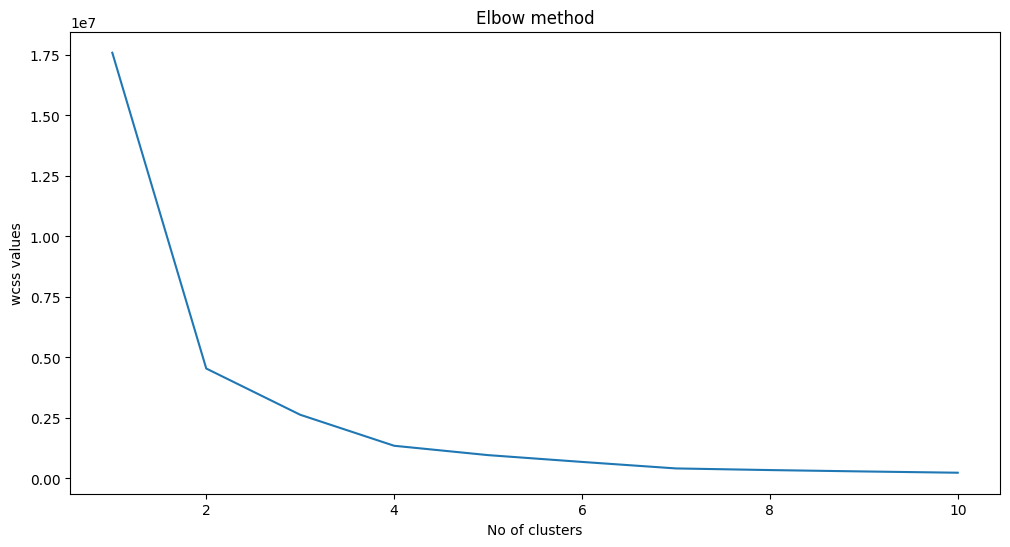

In [308]:
#plot wcss values values to find knee of elbow
plt.plot(range(1,11),wcss)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('wcss values')
plt.show()

In [309]:
#Model is built using kMeans algorithm and number of clusters as 2
kmeans=KMeans(n_clusters=2,init='k-means++',random_state=42,n_init='auto')
y_kmeans=kmeans.fit_predict(data)
y_kmeans  #prediction output is stored in array y_kmeans

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int32)

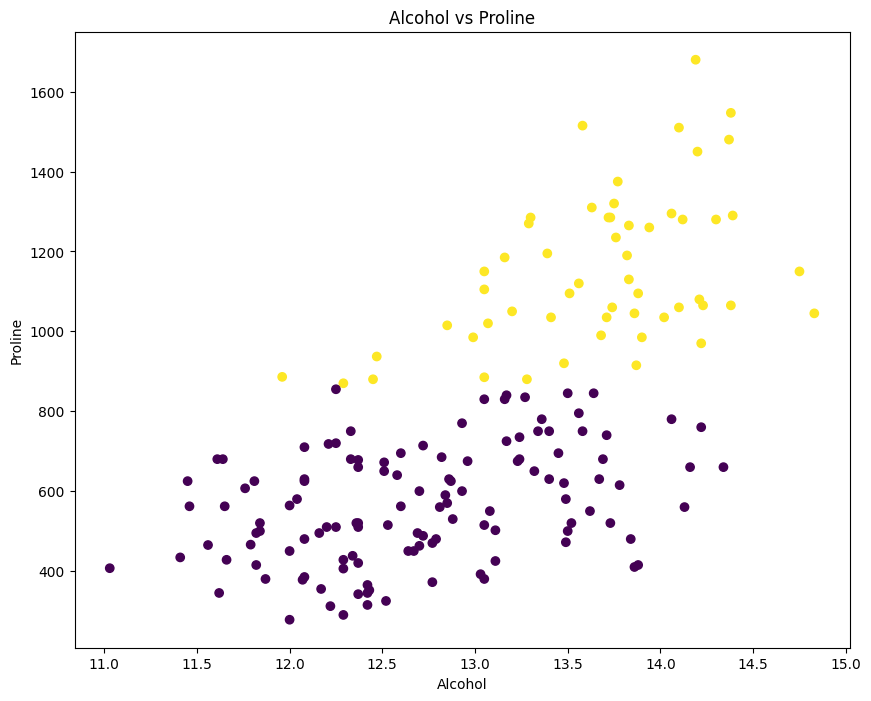

In [310]:
#scatter plot is drawn between two columns (Alcohol and Proline) for two different clusters
plt.figure(figsize=(10,8))
plt.scatter(data['Alcohol'],data['Proline'],c=y_kmeans)
plt.xlabel('Alcohol')
plt.ylabel('Proline')
plt.title('Alcohol vs Proline')
plt.show()


In [311]:
#Finding silhouette score of kmeans
from sklearn.metrics import silhouette_score
silhoutte_avg=silhouette_score(data,y_kmeans)
print('kmeans:',silhoutte_avg)

kmeans: 0.6568536504294317


In [312]:
# k means with PCA technique

In [313]:
#Standard scaling done to apply PCA technique for feature extraction
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
data_scaled=ss.fit_transform(data)
data_scaled=pd.DataFrame(data_scaled,columns=['Alcohol','Malic_Acid','Ash','Ash_Alcanity','Magnesium','Total_Phenols','Flavanoids','Nonflavanoid_Phenols','Proanthocyanins','Color_Intensity','Hue','OD280','Proline'])
data_scaled

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.876275,2.974543,0.305159,0.301803,-0.332922,-0.985614,-1.424900,1.274310,-0.930179,1.142811,-1.392758,-1.231206,-0.021952
174,0.493343,1.412609,0.414820,1.052516,0.158572,-0.793334,-1.284344,0.549108,-0.316950,0.969783,-1.129518,-1.485445,0.009893
175,0.332758,1.744744,-0.389355,0.151661,1.422412,-1.129824,-1.344582,0.549108,-0.422075,2.224236,-1.612125,-1.485445,0.280575
176,0.209232,0.227694,0.012732,0.151661,1.422412,-1.033684,-1.354622,1.354888,-0.229346,1.834923,-1.568252,-1.400699,0.296498


In [314]:
# 13 nos of dimensions are there, hence dimentions are reduced using PCA technique

In [315]:
from sklearn.decomposition import PCA
pca = PCA().fit(data_scaled)
pca.components_

array([[ 0.1443294 , -0.24518758, -0.00205106, -0.23932041,  0.14199204,
         0.39466085,  0.4229343 , -0.2985331 ,  0.31342949, -0.0886167 ,
         0.29671456,  0.37616741,  0.28675223],
       [-0.48365155, -0.22493093, -0.31606881,  0.0105905 , -0.299634  ,
        -0.06503951,  0.00335981, -0.02877949, -0.03930172, -0.52999567,
         0.27923515,  0.16449619, -0.36490283],
       [-0.20738262,  0.08901289,  0.6262239 ,  0.61208035,  0.13075693,
         0.14617896,  0.1506819 ,  0.17036816,  0.14945431, -0.13730621,
         0.08522192,  0.16600459, -0.12674592],
       [-0.0178563 ,  0.53689028, -0.21417556,  0.06085941, -0.35179658,
         0.19806835,  0.15229479, -0.20330102,  0.39905653,  0.06592568,
        -0.42777141,  0.18412074, -0.23207086],
       [-0.26566365,  0.03521363, -0.14302547,  0.06610294,  0.72704851,
        -0.14931841, -0.10902584, -0.50070298,  0.13685982, -0.07643678,
        -0.17361452, -0.10116099, -0.1578688 ],
       [-0.21353865, -0.536813

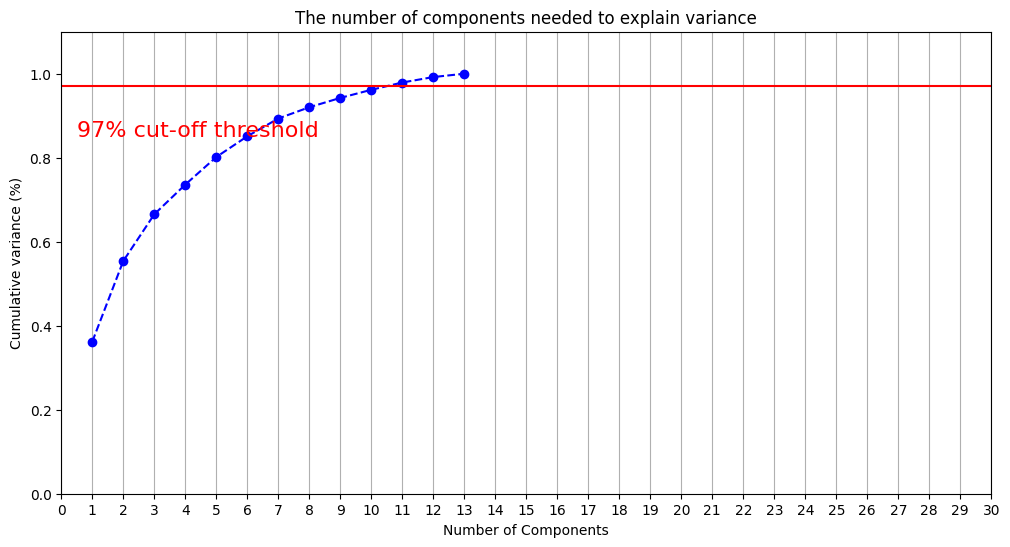

In [284]:
plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
xi = np.arange(1, 14, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 31, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.97, color='r', linestyle='-')
plt.text(0.5, 0.85, '97% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

In [316]:
#In order to get a scatter plot of applied clustering in 2D gragh, it is decided to take first two PCA components
pca = PCA(n_components = 2)
pca.fit(data_scaled)
x_pca = pca.transform(data_scaled)
x_pca.shape

(178, 2)

In [317]:
x_pca

array([[ 3.31675081, -1.44346263],
       [ 2.20946492,  0.33339289],
       [ 2.51674015, -1.0311513 ],
       [ 3.75706561, -2.75637191],
       [ 1.00890849, -0.86983082],
       [ 3.05025392, -2.12240111],
       [ 2.44908967, -1.17485013],
       [ 2.05943687, -1.60896307],
       [ 2.5108743 , -0.91807096],
       [ 2.75362819, -0.78943767],
       [ 3.47973668, -1.30233324],
       [ 1.7547529 , -0.61197723],
       [ 2.11346234, -0.67570634],
       [ 3.45815682, -1.13062988],
       [ 4.31278391, -2.09597558],
       [ 2.3051882 , -1.66255173],
       [ 2.17195527, -2.32730534],
       [ 1.89897118, -1.63136888],
       [ 3.54198508, -2.51834367],
       [ 2.0845222 , -1.06113799],
       [ 3.12440254, -0.78689711],
       [ 1.08657007, -0.24174355],
       [ 2.53522408,  0.09184062],
       [ 1.64498834,  0.51627893],
       [ 1.76157587,  0.31714893],
       [ 0.9900791 , -0.94066734],
       [ 1.77527763, -0.68617513],
       [ 1.23542396,  0.08980704],
       [ 2.18840633,

In [318]:
#find optimum number of clusters (k) using wcss and elbow method
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
  kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42,n_init='auto')
  kmeans.fit(x_pca)
  wcss.append(kmeans.inertia_)

wcss

[1282.1026695794815,
 629.3609307352834,
 260.0166626835766,
 192.39061530234846,
 159.0332667644553,
 152.6375419149244,
 123.05346843723112,
 115.2061551090837,
 83.42973006100937,
 76.4207725394274]

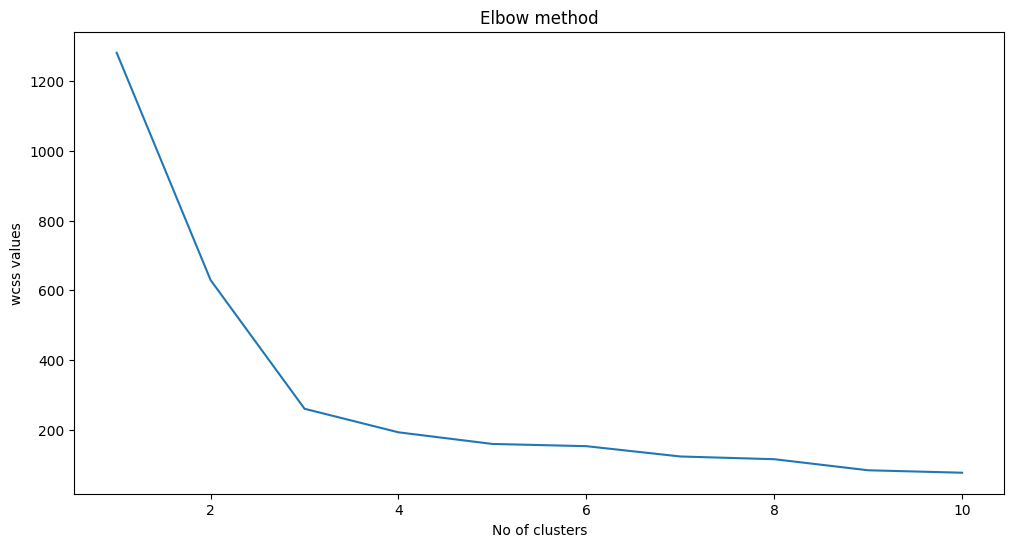

In [319]:
#plot wcss values values to find knee of elbow
plt.plot(range(1,11),wcss)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('wcss values')
plt.show()

From above graph, number of clusters can be taken as 3

In [320]:
#Model is built using kMeans algorithm and number of clusters as 3
kmeans=KMeans(n_clusters=3,init='k-means++',random_state=42,n_init='auto')
y_kmeans=kmeans.fit_predict(x_pca)
y_kmeans  #prediction output is stored in array y_kmeans

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int32)

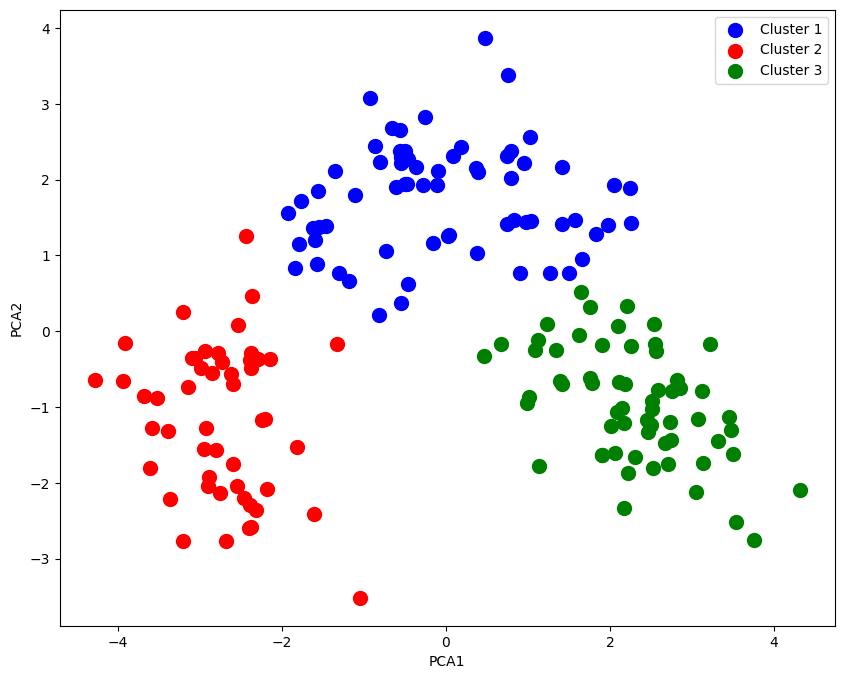

In [321]:
#scatter plot is drawn between two columns of x_pca (input) for three different clusters
plt.figure(figsize=(10,8))
plt.scatter(x_pca[y_kmeans == 0, 0], x_pca[y_kmeans == 0, 1],  s = 100, c = 'blue', label = 'Cluster 1')
plt.scatter(x_pca[y_kmeans == 1, 0], x_pca[y_kmeans == 1, 1], s = 100, c = 'red', label = 'Cluster 2')
plt.scatter(x_pca[y_kmeans == 2, 0], x_pca[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend()
plt.show()

In [322]:
#Finding silhouette score of kmeans
from sklearn.metrics import silhouette_score
silhoutte_avg=silhouette_score(x_pca,y_kmeans)
print('kmeans:',silhoutte_avg)

kmeans: 0.5601697480957203


In [323]:
#Agglomerative Hierarchial Clustering

In [324]:
#Agglomerative Clustering without PCA

In [325]:
#reading wine cluster dataset to python envt
data=pd.read_csv('/content/Wine_clust  (1).csv')
data

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [326]:
#import necessary libraries for dendrogram
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import fcluster

In [327]:
mergings = linkage(data,method='ward')

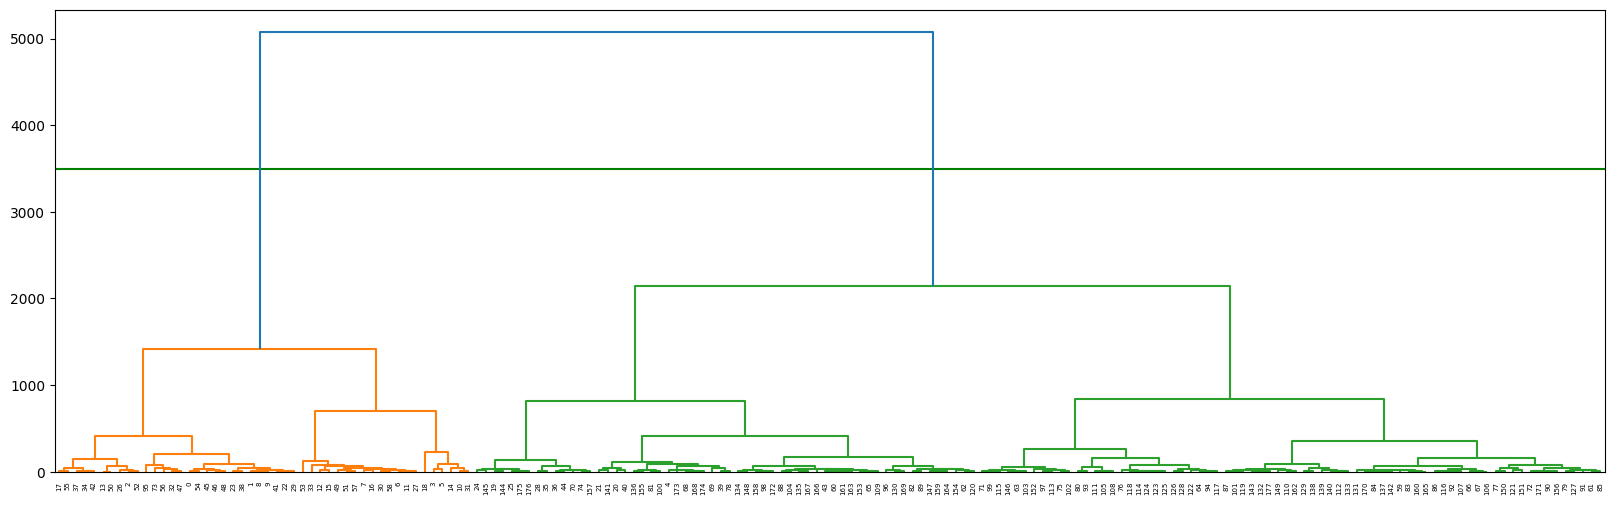

In [329]:
#draw dendrogram to find optimal number of clusters
plt.figure(figsize=(20,6))
plt.axhline(3500,color='green')
dendrogram(mergings)
plt.show()

In [330]:
#From above diagram, number of clusters can be chosen as 2


In [331]:
#perform agglomerative clustering with 2 clusters and store the predictions in y_hc
from sklearn.cluster import AgglomerativeClustering
hc=AgglomerativeClustering(n_clusters=2,affinity='euclidean',linkage='ward')
y_hc=hc.fit_predict(data)
y_hc

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

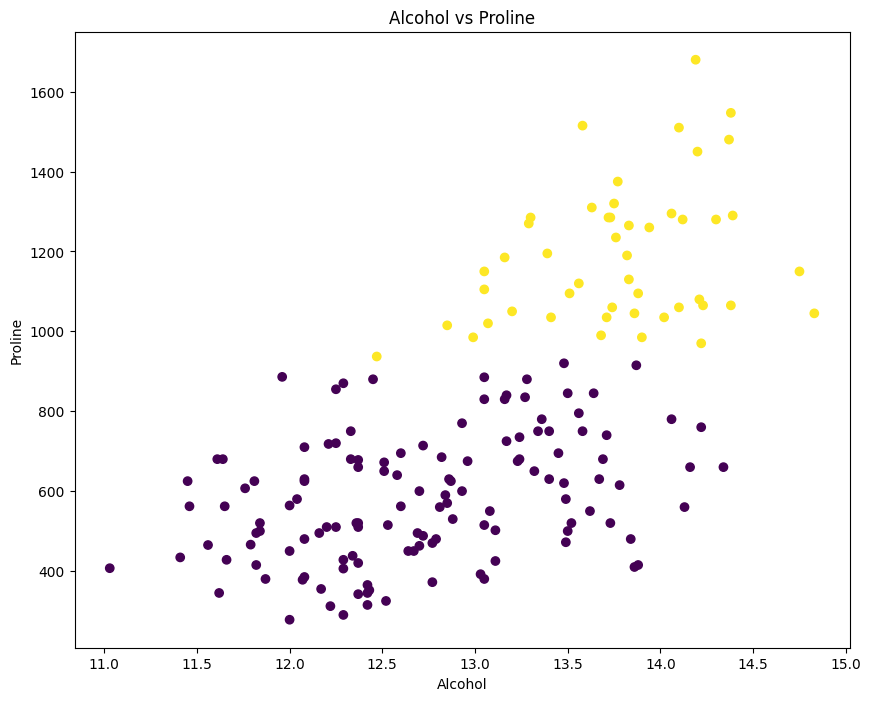

In [332]:
#scatter plot is drawn between two columns (Alcohol and Proline) for two different clusters
plt.figure(figsize=(10,8))
plt.scatter(data['Alcohol'],data['Proline'],c=y_hc)
plt.xlabel('Alcohol')
plt.ylabel('Proline')
plt.title('Alcohol vs Proline')
plt.show()

In [333]:
#find silhoutte score for agglomerative clustering
from sklearn.metrics import silhouette_score
silhoutte_avg=silhouette_score(data,y_hc)
print('agglomerative:',silhoutte_avg)

agglomerative: 0.6587292996216912


In [334]:
#Agglomerative Clustering with PCA

In [335]:
mergings = linkage(x_pca,method='ward')

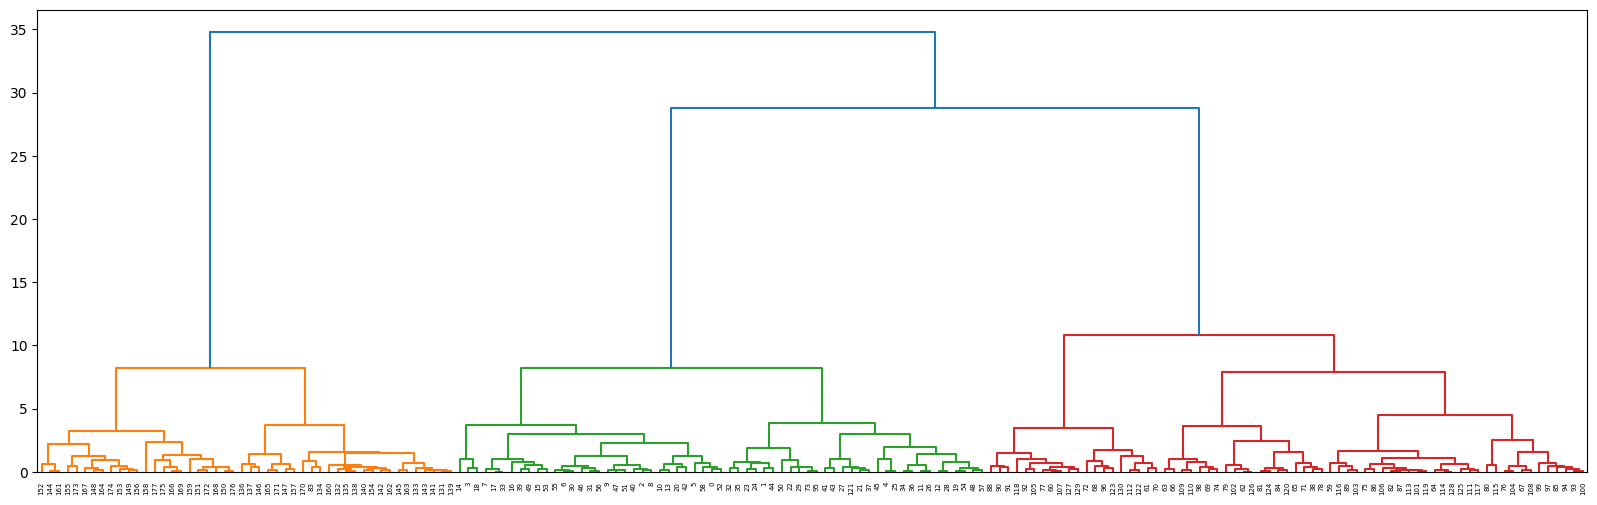

In [336]:
#draw dendrogram to find optimal number of clusters
plt.figure(figsize=(20,6))
dendrogram(mergings)
plt.show()

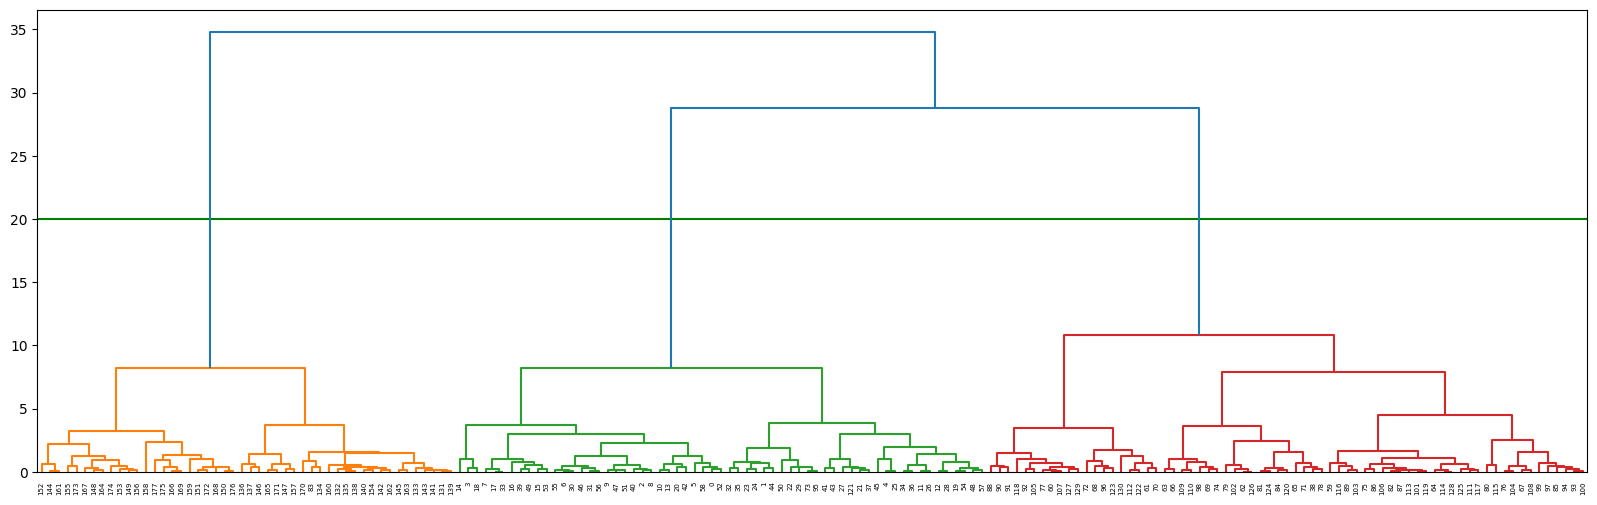

In [337]:
plt.figure(figsize=(20,6))
plt.axhline(20,color='green')
dendrogram(mergings)
plt.show()

From above diagram, number of clusters can be chosen as 3




In [338]:
#perform agglomerative clustering with 3 clusters and store the predictions in y_hc
from sklearn.cluster import AgglomerativeClustering
hc=AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward')
y_hc=hc.fit_predict(x_pca)
y_hc

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

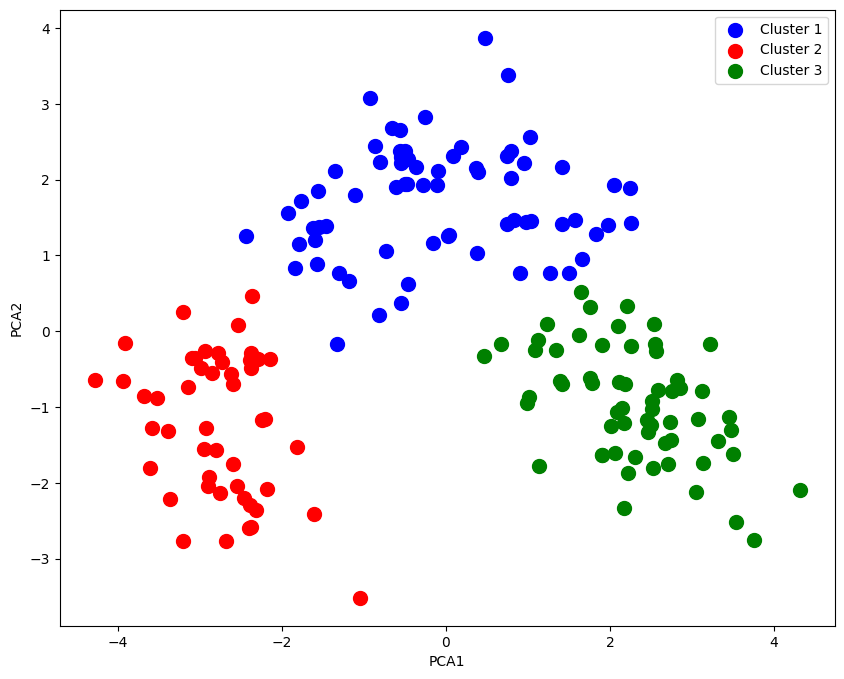

In [339]:
#scatter plot is drawn between two columns of x_pca (input) for three different clusters
plt.figure(figsize=(10,8))
plt.scatter(x_pca[y_hc == 0, 0], x_pca[y_hc == 0, 1],  s = 100, c = 'blue', label = 'Cluster 1')
plt.scatter(x_pca[y_hc == 1, 0], x_pca[y_hc == 1, 1], s = 100, c = 'red', label = 'Cluster 2')
plt.scatter(x_pca[y_hc == 2, 0], x_pca[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend()
plt.show()

In [340]:
#find silhoutte score for agglomerative clustering
from sklearn.metrics import silhouette_score
silhoutte_avg=silhouette_score(x_pca,y_hc)
print('agglomerative:',silhoutte_avg)

agglomerative: 0.5590883962040384


In [341]:
#DB Scan algorithm

In [342]:
from sklearn.cluster import DBSCAN

In [343]:
db=DBSCAN(eps=0.55,min_samples=5)
clusters=db.fit_predict(x_pca)
clusters

array([ 0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,
        0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0, -1,  0,  0,  0,  0, -1,
        0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1, -1,  0,  1,  0,  0,  1,
       -1,  0,  1,  0, -1,  0,  0,  1,  1,  1,  0,  0, -1,  0,  1,  2,  0,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  0, -1,  1,  0,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1,  0,  0,  1,  1,  1,  1, -1,  1,  1, -1,
        1,  0,  0,  1, -1,  0,  1, -1,  1,  1,  1, -1,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2, -1,  2,  2,  2,  2,  2,  2,  2, -1,
        2,  2,  2,  2,  2, -1, -1,  2, -1,  2,  2,  2,  2,  2,  2,  2,  2,
       -1,  2,  2,  2,  2,  2,  2,  2])

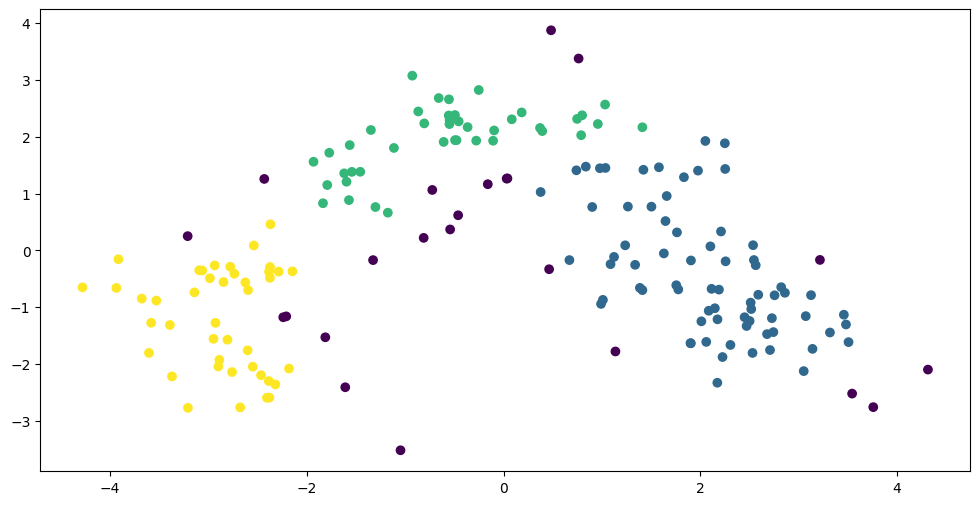

In [344]:
plt.scatter(x_pca[:,0],x_pca[:,1],c=clusters,cmap='viridis')
plt.show()

From above plot, it is found that three clusters were formed (shown as yellow, green and violet). Outliers are marked as black

In [345]:
#silhouette score for DB scan algorithm
silhoutte_avg=silhouette_score(x_pca,clusters)
print('DBScan:',silhoutte_avg)

DBScan: 0.40815942562739777


Following Silhoutte scores were obtained:

1) K Means - 0.6568 (without PCA technique) and 0.5601 (with two PCA components)

2) Agglomerative - 0.6587 (without PCA technique) and 0.5590 (with two PCA components)

3) DB Scan - 0.4081

Optimum no of clusters were obtained as follows:

1) K Means - 2 (without PCA technique) and 3 (with two PCA components)

2) Agglomerative - 2 (without PCA technique) and 3 (with two PCA components)

3) DB Scan - 3